# CUSTOMER SEGMENTATION

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import numpy as np

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [5]:
data.drop(data.columns[0], inplace=True, axis=1)
print("\n{}".format(data.isnull().sum()))
print("\n{}".format(data.dtypes))


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object


In [6]:
n_unique = data.nunique()
n_unique

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

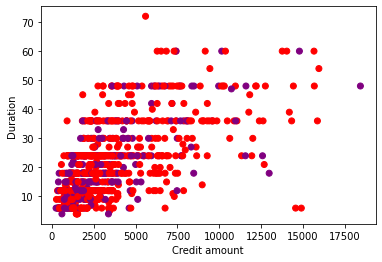

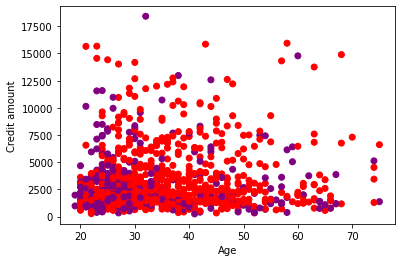

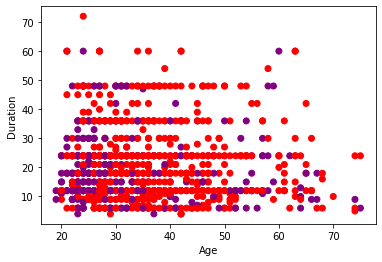

In [7]:
# scatters(data, h="Sex")
colors = {'male':'red', 'female':'purple'}
plt.scatter(data['Credit amount'], data['Duration'], c=data['Sex'].map(colors))
plt.xlabel("Credit amount")
plt.ylabel("Duration")
plt.show()
#########
plt.scatter(data['Age'], data['Credit amount'], c=data['Sex'].map(colors))
plt.xlabel("Age")
plt.ylabel("Credit amount")
plt.show()
#########
plt.scatter(data['Age'], data['Duration'], c=data['Sex'].map(colors))
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

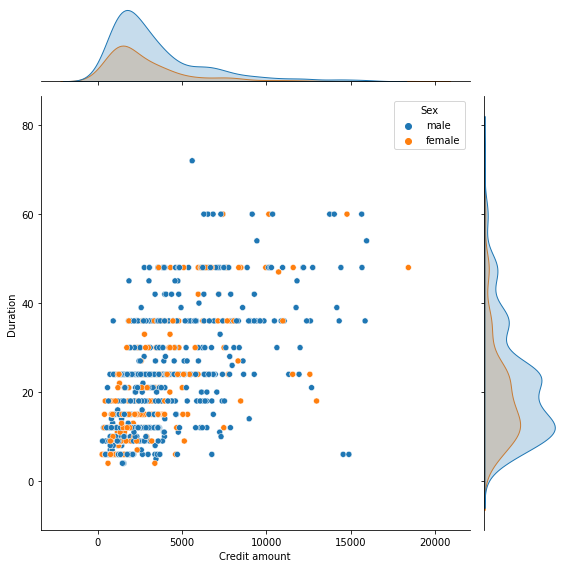

In [8]:
import scipy.stats as stats
r1 = sns.jointplot(x="Credit amount",y="Duration", data=data, kind="scatter",hue='Sex' ,height=8)

plt.show()

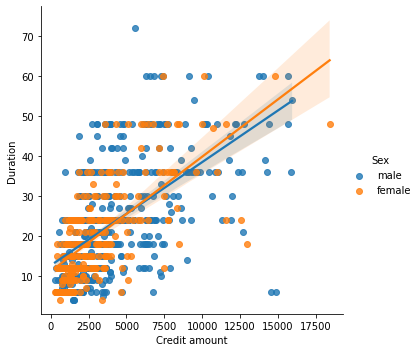

In [9]:
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=data)
plt.show()

c:\Users\91600\Downloads\segmentationproj\seg\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


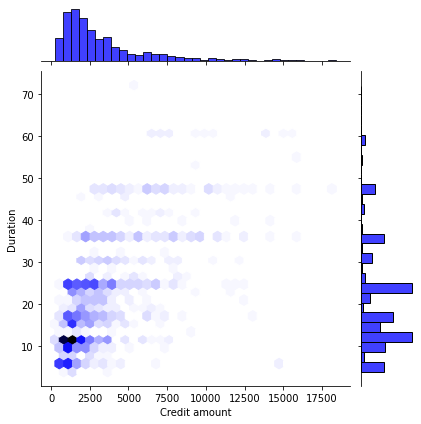

In [10]:
sns.jointplot("Credit amount","Duration", data=data, kind="hex", color="blue")
plt.show()

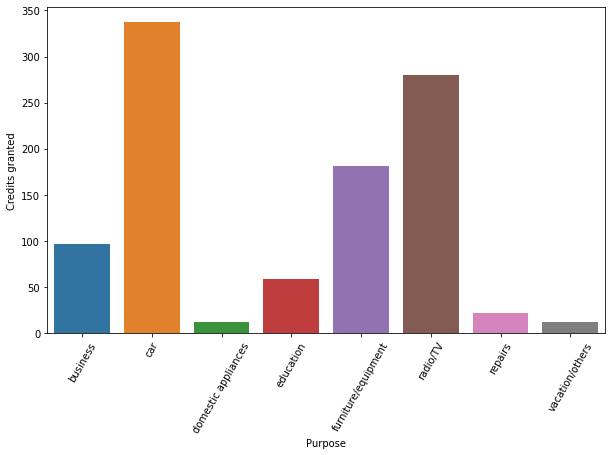

In [11]:
n_credits = data.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"])

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Credits granted")
plt.show()

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')]

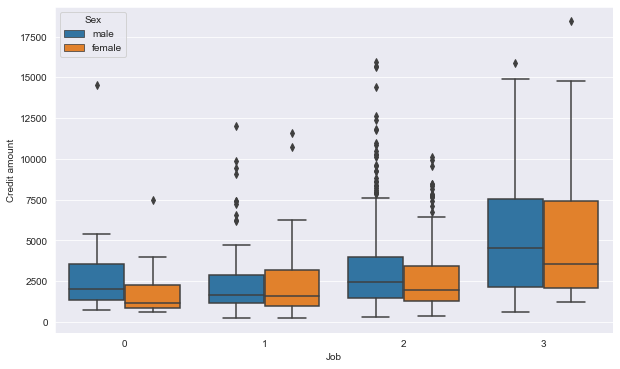

In [12]:

sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10,6))
box = sns.boxplot(x='Job',y='Credit amount', hue='Sex', data=data)
box.set_xticklabels(box.get_xticklabels())


[Text(0, 0, 'radio/TV'),
 Text(1, 0, 'education'),
 Text(2, 0, 'furniture/equipment'),
 Text(3, 0, 'car'),
 Text(4, 0, 'business'),
 Text(5, 0, 'domestic appliances'),
 Text(6, 0, 'repairs'),
 Text(7, 0, 'vacation/others')]

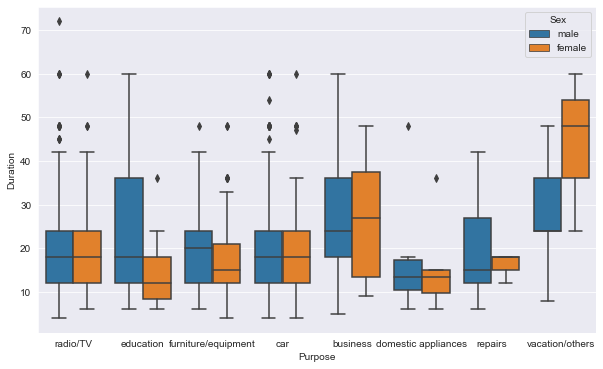

In [13]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10,6))
box = sns.boxplot(x='Purpose',y='Duration', hue='Sex', data=data)
box.set_xticklabels(box.get_xticklabels())

[Text(0, 0, 'radio/TV'),
 Text(1, 0, 'education'),
 Text(2, 0, 'furniture/equipment'),
 Text(3, 0, 'car'),
 Text(4, 0, 'business'),
 Text(5, 0, 'domestic appliances'),
 Text(6, 0, 'repairs'),
 Text(7, 0, 'vacation/others')]

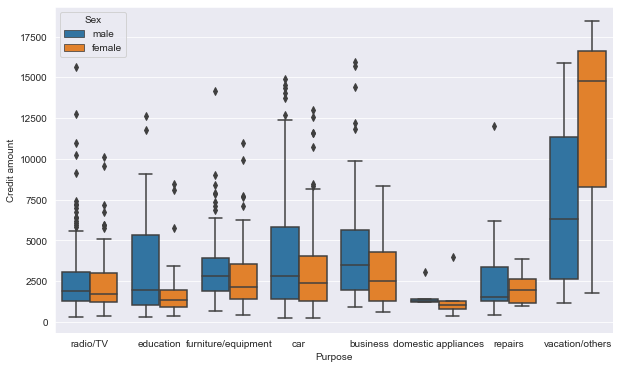

In [14]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10,6))
box = sns.boxplot(x='Purpose',y='Credit amount', hue='Sex', data=data)
box.set_xticklabels(box.get_xticklabels())

# K-Means

In [15]:
selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = data.loc[:,selected_cols]

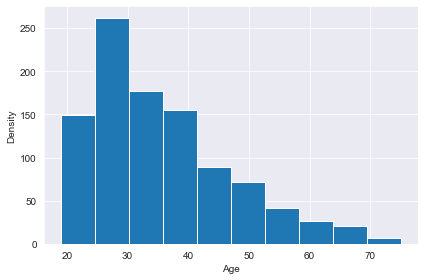

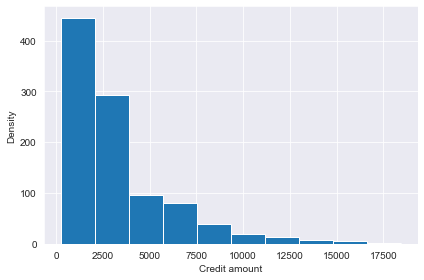

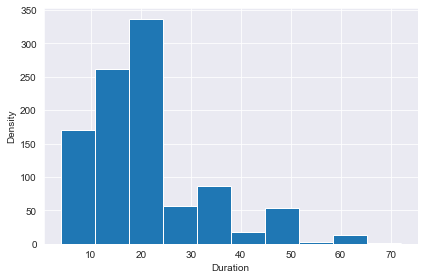

In [16]:


plt.hist(cluster_data["Age"])
plt.xlabel("Age")
plt.ylabel("Density")
plt.tight_layout()
plt.show()
#########
plt.hist(cluster_data["Credit amount"])
plt.xlabel("Credit amount")
plt.ylabel("Density")
plt.tight_layout()
plt.show()
#########
plt.hist(cluster_data["Duration"])
plt.xlabel("Duration")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

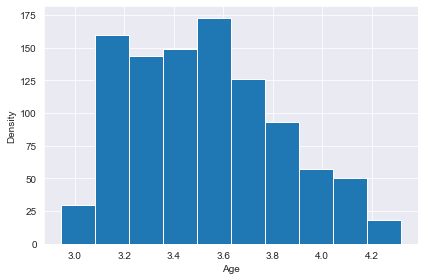

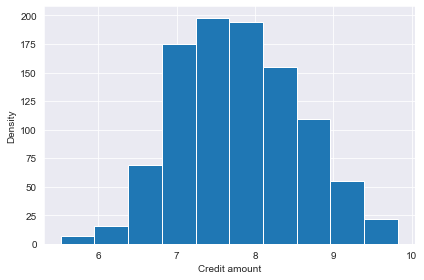

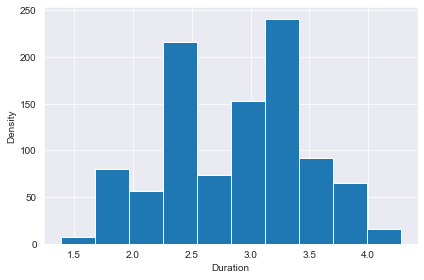

In [17]:
#The distributions is right skewed
import numpy as np
cluster_log = np.log(cluster_data)
plt.hist(cluster_log["Age"])
plt.xlabel("Age")
plt.ylabel("Density")
plt.tight_layout()
plt.show()
#########
plt.hist(cluster_log["Credit amount"])
plt.xlabel("Credit amount")
plt.ylabel("Density")
plt.tight_layout()
plt.show()
#########
plt.hist(cluster_log["Duration"])
plt.xlabel("Duration")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [18]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)
df_normalized = normalize(cluster_scaled)
df_normalized = pd.DataFrame(df_normalized)

pca = PCA(n_components = 3)
X_principal = pca.fit_transform(df_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2', 'P3']

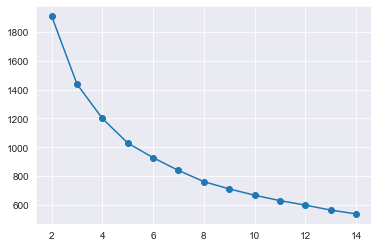

In [19]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

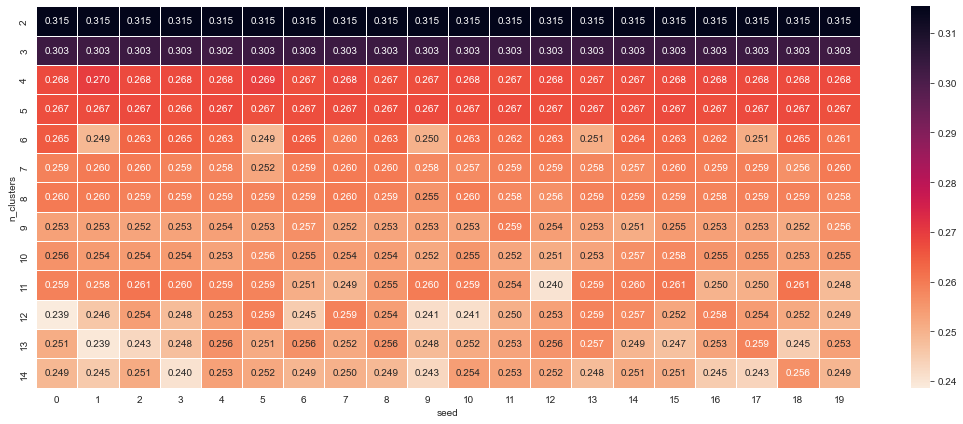

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()



In [27]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

In [29]:
import matplotlib.cm as cm

clusterer = KMeans(n_clusters=3, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 3," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample




For n_clusters = 3  and seed = 19 
The average silhouette_score is : 0.30255813750380023


In [30]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km


,Age,Credit amount,Duration
Cluster,,,
0,48.5,1970.3,13.9
1,34.0,5665.4,32.2
2,27.7,1736.3,14.3


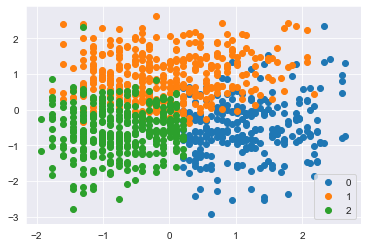

In [118]:
# scatters(clustered_data, 'Cluster')
# colors = {0:'red', 1:'purple', 2:'green'}
# plt.scatter(cluster_data['Credit amount'], cluster_data['Duration'], c=cluster_data['Cluster'].map(colors))
# plt.xlabel("Credit amount")
# plt.ylabel("Duration")

#########
# plt.scatter(cluster_data['Age'], cluster_data['Credit amount'], c=cluster_data['Cluster'].map(colors))
# plt.xlabel("Age")
# plt.ylabel("Credit amount")
# plt.show()
# #########
# plt.scatter(cluster_data['Age'], data['Duration'], c=clustered_data['Cluster'].map(colors))
# plt.xlabel("Age")
# plt.ylabel("Duration")
# plt.show()
u_labels = np.unique(cluster_labels)

u_labels
for i in u_labels:
    plt.scatter(cluster_scaled[cluster_labels == i , 0] , cluster_scaled[cluster_labels == i , 1] , label = i)
    
plt.legend()
plt.show()

# Agglomerative Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

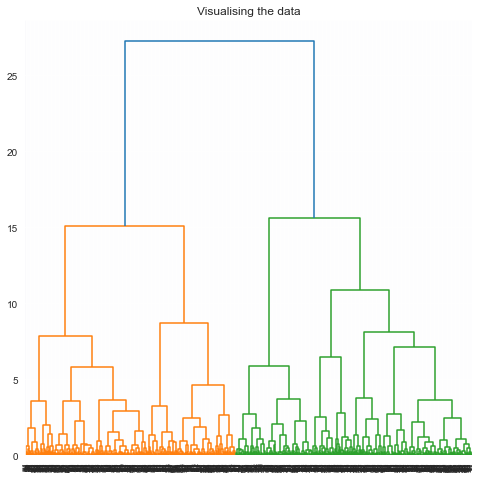

In [21]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df_normalized, method ='ward')))

c:\Users\91600\Downloads\segmentationproj\seg\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


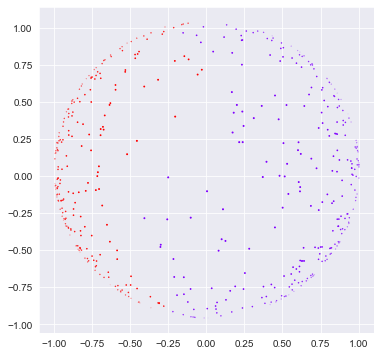

In [24]:

ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'],
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()